In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import c14
import c14.livermodels as m

In [3]:
data = pd.read_csv('../../../results/C14data_liver_samples_20190502.csv')
c14_patient_data = data.groupby(['type', 'sample', 'ploidy', 'pathology']).mean().dropna(how='all').reset_index()
c14_patient_data['age'] = c14_patient_data.Dcoll - c14_patient_data.Dbirth 
data = c14_patient_data.query('type == "hepatocyte"')

In [15]:

edata = c14.exp_data(data)
m1 = m.IPl()
op = c14.optimize(model=m1,data=edata)


In [20]:
res = op.optimize_minuit(m1.default_parameters)
res

({'d2': 0.5957645298971713,
  'd4': 0.3059902255094122,
  'k24': 0.2202191240955587,
  'k42': 0.3459842925408711},
 {'d2': 0.0003365206056736292,
  'd4': 0.0005468234464645338,
  'k24': 0.000349726052338295,
  'k42': 0.00046654932635178947},
 -93.90187653077129,
 False,
 -------------------------------------
|     |     d2     d4    k24    k42 |
-------------------------------------
|  d2 |   1.00  -0.23  -0.85  -0.26 |
|  d4 |  -0.23   1.00   0.63   0.56 |
| k24 |  -0.85   0.63   1.00   0.64 |
| k42 |  -0.26   0.56   0.64   1.00 |
-------------------------------------)

In [5]:
op.loglike_dict(m1.default_parameters,m1)


87.91308939780423

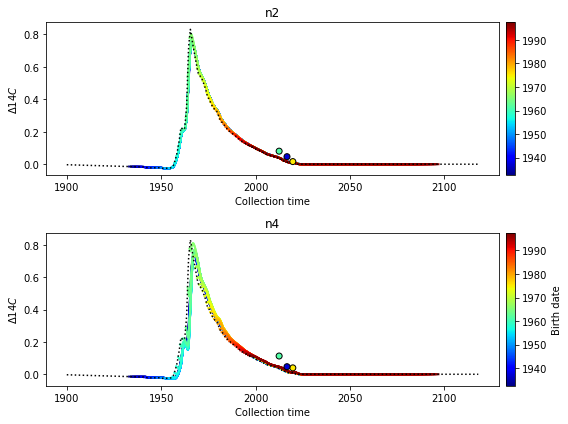

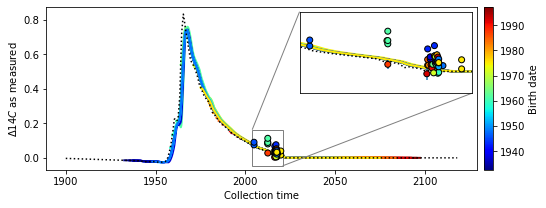

In [13]:
import matplotlib as mpl

m1.set_parameters(m1.default_parameters)
vis= c14.visualisze(model=m1,data=edata)
vis.odeint()
norm = mpl.colors.Normalize(vmin=data.Dbirth.min(),vmax=data.Dbirth.max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
sm.set_array([]);sm.cmap.set_under([0,0,0,0]);sm.cmap.set_over([0,0,0,0])
axs,sm = vis.plot_generic(sm=sm)
vis.plot_data(axis=axs['n2'],data=data[data.ploidy=='2n'],sm=sm)
vis.plot_data(axis=axs['n4'],data=data[data.ploidy=='4n'],sm=sm)
plt.figure(figsize=(8,3))
vis.plot_simdata()

In [14]:
pe,std,chain = op.optimize_emcee(steps=200,nwalkers=8,threads=4)

KeyboardInterrupt: 

In [ ]:
op.calc_kde(50)
po = op.maxkde_auto()
print(pe,po)

In [ ]:
burnin=0

m = m1
chain = chain
f = plt.figure(1,figsize=(10,5*m.nparas))
shape = (m.nparas,1)
for j in range(m.nparas):
    ax = plt.subplot2grid(shape,(j,0),fig=f) 
    i=0
    maxy = 0
    miny = 10000
    for _ in range(100):
        try:
            ax.plot(chain[i,:,j])
            on = m.parameter_names[j]

            i = i+1
            maxy = max(chain[i,burnin:,j].max()*1.1,maxy)
            miny = min(chain[i,burnin:,j].min()*0.9,miny)
        except IndexError:
            break
    ax.set_ylim(miny,maxy)


